# **WEB SCRAPING and WORDCLOUD using PYTHON**

In this project we will extract data from a webpage and then use this data to create a Wordcloud and a DataFrame, both of which will contain useful information. The webpage used for our example, is an interesting music blog in WordPress. You can explore it [here](https://vaggelisrevolted.wordpress.com/).<br>
So we will extract the following for each post:<br>

* All the description texts
* The date the postcreated
* Title of the post
* YouTube link

First we will import all the libraries we will need.

In [1]:
import os
from os import path, getcwd
import pandas as pd
from bs4 import BeautifulSoup
from bs4.dammit import EncodingDetector
import requests
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt 
from PIL import Image
import urllib.request
import numpy as np
import itertools


path = 'https://github.com/AngelosTheodorakis/Data_Analysis_Projects/blob/master/Web%20scraping%20and%20Wordcloud/'



To make our code easier to understand and also more efficient, we will use functions to extract the information we want.<br>
We will first create a function that will get all the data from a webpage, with the help of BeautifulSoup library.


In [2]:
def get_soup(html):
    """ Get data for web page"""
    resp = requests.get(html)
    http_encoding = resp.encoding if 'charset' in resp.headers.get('content-type', '').lower() else None
    html_encoding = EncodingDetector.find_declared_encoding(resp.content, is_html=True)
    encoding = html_encoding or http_encoding
    soup = BeautifulSoup(resp.content, from_encoding=encoding)
    return soup

The function for getting all the links and their titles from the webpage would be the following.

In [3]:
def get_links(soup):
    """ Get links from a web page """
    http_link_list = [] 
    for link in soup.find_all('a', href=True):
        if link['href'][0] == 'h': 
            http_link_list.append(link['href'].strip("'"))
            
    return http_link_list



In [4]:
def get_title(soup):
    """ Get titles from links from webpage """
    title_list = []
    for link in soup.find_all('a', href=True):
        if link['href'][0] == 'h': 
            title_list.append(link.text.strip("'"))            
    return title_list





However, we will need to extract information just from the archives in the left part of the page. To do this, we will use the following function. 

In [5]:
def get_specific_links(soup):
    """Get all the links in 'Archives' and their titles """
    http_specific_link_list = []
    specific_links_titles = []
    for x in soup.find_all(class_="widget widget_archive"):
        for y in x.find_all('li'):
            a = y.find('a')
            http_specific_link_list.append(a['href'])
            specific_links_titles.append(a.get_text())
    return http_specific_link_list,specific_links_titles

With the above functions we managed to get all the archive links and their titles from the Home page. The next step is to create functions to extract the following information for each archive <br>

* All the post descriptions.
* The date the post was made.
* The post title.
* The YouTube link for each post.


We will start with the function for extracting the post description.

In [6]:
def get_ps(soup):
    """ get <p> tags from web page (post description)"""
    http_link_list = [] 
    for link in soup.find_all('p'):
        http_link_list.append(link.get_text())
    return http_link_list 


We continue with the following function which captures the title, the date and the link for each post.

In [7]:
def get_inside_links(soup):  
    """ Get links, dates and titles from a post """
    http_inner_link_list = []
    http_inner_date_list = []
    http_inner_title_list = []
    for link in soup.find_all('iframe', class_='youtube-player'): # get YouTube link
        vid = link['src'].split('/')[4]
        vid_id = vid.split('?')[0]
        vid_id = "https://www.youtube.com/watch?v="+vid_id
        http_inner_link_list.append(vid_id.strip("'"))
    for x in soup.find_all(class_="posttitle"): # get date
        c = x.find('small')
        a= c.get_text()
        http_inner_date_list.append(a.strip())
    for y in soup.find_all(class_="pagetitle"): # get title
        d = y.find('a')
        http_inner_title_list.append(d['title'])
    return http_inner_link_list,http_inner_date_list,http_inner_title_list


In the final step, we will create a function that captures all the information we need, combining the functions above.

In [8]:
def get_episode_text(episode_list):
    """get all the information combining the above functions"""
    text_return = []
    links_return = []
    dates_return = []
    titles_return = []
    for i in specific_links:
        print(i)
        soup = get_soup(i)
        text_array = get_ps(soup)
        links, dates, titles = get_inside_links(soup)
        #full_text = get_text(text_array)
        #text_return.append(full_text)
        text_return.append(text_array)
        links_return.append(links)
        dates_return.append(dates)
        titles_return.append(titles)
        
    return text_return,links_return,dates_return,titles_return

Below we will type the name of our webpage and call our functions.

In [9]:
webpage = 'https://vaggelisrevolted.wordpress.com/'

# gets word soup from website 
soupout = get_soup(webpage)

In [10]:
# only relevant links
specific_links,specific_titles = get_specific_links(soupout)

In [11]:
# return description texts, YouTube links, dates, and titles of all archives 
text_return_list,links_return_list,dates_return_list, titles_return_list= get_episode_text(specific_links)


https://vaggelisrevolted.wordpress.com/2020/04/
https://vaggelisrevolted.wordpress.com/2020/02/
https://vaggelisrevolted.wordpress.com/2019/02/
https://vaggelisrevolted.wordpress.com/2018/11/
https://vaggelisrevolted.wordpress.com/2018/10/
https://vaggelisrevolted.wordpress.com/2018/03/
https://vaggelisrevolted.wordpress.com/2018/02/
https://vaggelisrevolted.wordpress.com/2018/01/
https://vaggelisrevolted.wordpress.com/2017/11/
https://vaggelisrevolted.wordpress.com/2017/10/
https://vaggelisrevolted.wordpress.com/2017/08/
https://vaggelisrevolted.wordpress.com/2017/06/
https://vaggelisrevolted.wordpress.com/2017/05/
https://vaggelisrevolted.wordpress.com/2017/03/
https://vaggelisrevolted.wordpress.com/2016/11/
https://vaggelisrevolted.wordpress.com/2016/10/
https://vaggelisrevolted.wordpress.com/2016/09/
https://vaggelisrevolted.wordpress.com/2016/02/
https://vaggelisrevolted.wordpress.com/2015/12/
https://vaggelisrevolted.wordpress.com/2015/10/
https://vaggelisrevolted.wordpress.com/2

Now that we have all the data we need we will clean it a bit..

In [12]:
merged_titles = list(itertools.chain(*titles_return_list)) # Make nested lists merge into one list
for x in range(len(merged_titles)):
    merged_titles[x] = merged_titles[x][18:]
    
merged_dates = list(itertools.chain(*dates_return_list))

merged_videos = list(itertools.chain(*links_return_list))
for x in range(len(merged_dates)):
    merged_dates[x] = merged_dates[x][8:18]




We will now create a DataFrame with all the information we need.

In [13]:
SummaryDF = pd.DataFrame(
    {'Date': merged_dates,
     'Title': merged_titles,
     'YouTube Link': merged_videos
    })
 

SummaryDF.head(8)

,Date,Title,YouTube Link
0,24/04/2020,Aeon Aphelion – “Blind Descent” EP (Co-Product...,https://www.youtube.com/watch?v=VhMJ7zJH_e4
1,17/02/2020,Void Era – “ The Way It Starts” EP (Co-Recordi...,https://www.youtube.com/watch?v=Y7KtXUtT3T4
2,03/02/2019,Enthroned Serpent – “Towards the Unknown” EP (...,https://www.youtube.com/watch?v=A0M3ez4GgJQ
3,04/11/2018,"Primitive – “Sinner” Album (Production, Mixing...",https://www.youtube.com/watch?v=S63IiY3D43Q
4,27/10/2018,"Wild Machine – “Work It Out” (Production, Mixi...",https://www.youtube.com/watch?v=5l5onAp3w4s
5,11/03/2018,"Panos Smyrnaios “Μου το ‘χαν πει” (Recording, ...",https://www.youtube.com/watch?v=gyoXAGoZI6g
6,03/02/2018,"Jagertees – “Separation”(Production, Mixing, M...",https://www.youtube.com/watch?v=UKqdklqRgKQ
7,23/01/2018,"Spiros Akratos “Της Ζωής Δανεικά” (Recording, ...",https://www.youtube.com/watch?v=H6ifT7Rr7WA


Finally we will get all the text from the description and make the Wordcloud. 

In [14]:
merged_text = list(itertools.chain(*text_return_list))
merged_text_final = list(filter(None, merged_text))
all_text = "".join(merged_text_final) 

In [15]:
# Read our image 
URL = path + 'Twitter.jpg?raw=true'

with urllib.request.urlopen(URL) as url:
    with open('temp.jpg', 'wb') as f:
        f.write(url.read())

# We choose the mask
mask_logo = np.array(Image.open('temp.jpg'))


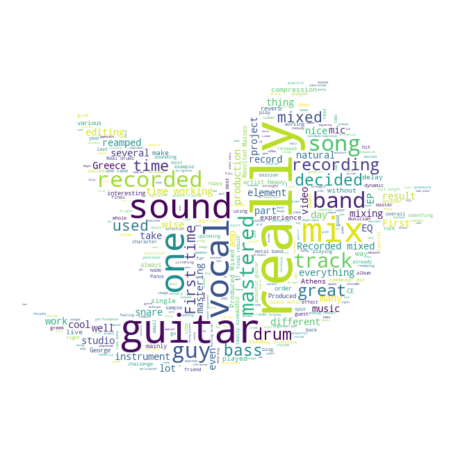

In [16]:
# Create the word cloud object 
wc= WordCloud(background_color="white",
              width=400,
              height=800,
              max_words=400,
              max_font_size=80, 
              mask=mask_logo,
              stopwords=set(STOPWORDS))

# Generate text
wc.generate(all_text)

# Create the plot 
plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

Let's try one more

In [17]:
# Read our image 
URL = path + 'heart.jpg?raw=true'

with urllib.request.urlopen(URL) as url:
    with open('temp.jpg', 'wb') as f:
        f.write(url.read())

# We choose the mask
mask_logo = np.array(Image.open('temp.jpg').convert("RGB"))


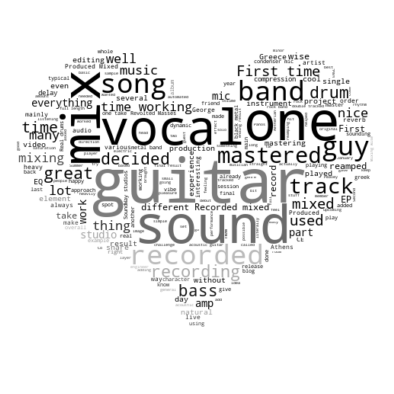

In [18]:
#create the word cloud object 
wc= WordCloud(background_color="white",
              max_words=400,
              max_font_size=80,
              width=400,
              height=800,
              mask=mask_logo,
              stopwords= ["really"] + list(STOPWORDS)) # drop the word 'really'

#wc.generate(text)
wc.generate(all_text)

image_colors = ImageColorGenerator(mask_logo)
wc.recolor(color_func = image_colors)

plt.figure(figsize=(14,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see that some of the most used words are *guitar*, *one*, *mix*, *sound*, *mastered*, *vocal* and *song*.